# CREDIT RISK MODEL

Importing Libraries

#CONTEXT

It is important that bank are able to recognize fraudulent customers to maintain proper cashflow and minimize the defaults on loan.

CONTENT

The datasets contains list of customers who can default on the loan in January 2015 by xyz bank. This dataset 

This dataset presents details of customers that occurred of 2 year, where we have 10026 frauds out of 150000 customers. The dataset is highly unbalanced, the negative class (frauds) account for 0.06% of all customers.

It contains only numerical input variables which are the result data feature enginerring. The feature 'Monthly income' is the transaction Amount, this feature can be used for example  --cdependant cost-senstive learning. Feature 'SeriousDlqin2yrs' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from math import *
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from operator import itemgetter

import seaborn as sns


#pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns


/Users/hswamy/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Reading CSV Data

In [2]:
data = pd.read_csv("cs-training.csv")

#data = pd.read_csv("surrogate_test_data.csv")


# EXPLORATORY DATA ANALYSIS

Describing the Data

In [3]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
data=data.drop('Unnamed: 0', axis = 1)

Data description after dropping Unnamed column

In [8]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NoIncome_MI_indicator
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000,150000.0
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222,0.0
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.0
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,0.0


Data Columns

Cleaning Columns names : Removing '-' from columns names

In [9]:
cleanCol = []
for i in range(len(data.columns)):
    cleanCol.append(data.columns[i].replace('-', ''))


In [10]:
"""Cleaned Column names"""
cleanCol

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime3059DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime6089DaysPastDueNotWorse',
 'NumberOfDependents',
 'NoIncome_MI_indicator']

In [11]:
"""Saving cleaned column names back to the data column"""
data.columns = cleanCol

Checking the top 5 rows of Dataset

In [12]:
data.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,NoIncome_MI_indicator
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0


Counting Null/NA values in Dataset

In [13]:
"""Monthly Income and Number of Dependents have null values"""
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime3059DaysPastDueNotWorse         0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime6089DaysPastDueNotWorse         0
NumberOfDependents                       3924
NoIncome_MI_indicator                       0
dtype: int64

Checking Class Distribution : This data is highly Imbalanced

Histogram of Age

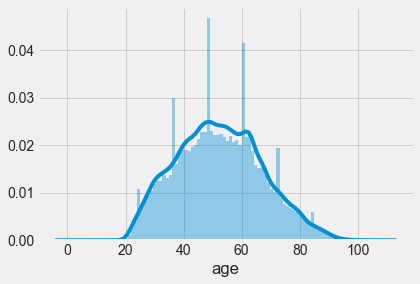

In [14]:
sns.distplot( data["age"],bins=100)


Distribution of Age in Dataset

In [15]:
"""Describing Age. The minimum age is 0 and maximum is 109"""
data.age.describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [16]:
"""age should be between a defined range, 0-109 makes less sense, should be between 22-91"""

'age should be between a defined range, 0-109 makes less sense, should be between 22-91'

In [17]:
"""Median and Mean Ages"""
np.median(data.age)
#np.mean(data.age)


52.0

In [18]:
"""Removing Outlier ": Replacing age younger than 22 and  greater than 91 with mean of age"""
median_age=np.median(data.age)
ageNew=[]
for val in data.age:
    if val < 22 or val >91:
        ageNew.append(median_age)
    else:
        ageNew.append(val)

In [19]:
"""New Age after treatment"""
#ageNew

'New Age after treatment'

In [20]:
"""Saving new age back to the original mage column"""
data.age = ageNew

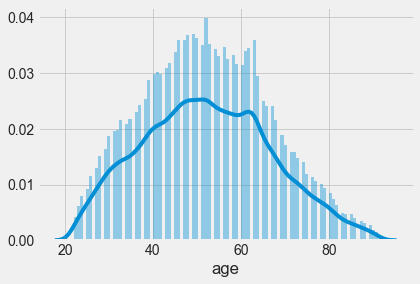

In [21]:
"""Histogram of Age after removing Outliers"""
sns.distplot( data["age"],bins=100)

RevolvingUtilizationOfUnsecuredLines

In [22]:
"""RevolvingUtilizationOfUnsecuredLines = Total balance on credit cards and personal lines of credit 
except real estate and no installment debt like car loans divided by the sum of credit limits"""


'RevolvingUtilizationOfUnsecuredLines = Total balance on credit cards and personal lines of credit \nexcept real estate and no installment debt like car loans divided by the sum of credit limits'

In [23]:
"""Describing the RevolvingUtilizationOfUnsecuredLines"""
data.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [24]:
""" # of RevolvingUtilizationOfUnsecuredLines greater than 1"""
len(data[data.RevolvingUtilizationOfUnsecuredLines >1])


3321

In [25]:
"""the value here should be between 0-1 [implies 0 to 100%], but few values are more than 1 [implying more than 100%], 
so all those values must be a data entry error and should be changed to the value/100"""

'the value here should be between 0-1 [implies 0 to 100%], but few values are more than 1 [implying more than 100%], \nso all those values must be a data entry error and should be changed to the value/100'

In [26]:
"""Capping RevolvingUtilizationOfUnsecuredLines greater than 1 with 1"""
for val in data.RevolvingUtilizationOfUnsecuredLines:
    if val >1:
        data['RUUL_indicator']=1
    else:
        data['RUUL_indicator']=0

In [27]:
RUULNew=[]

for val in data.RevolvingUtilizationOfUnsecuredLines:
    if val <=10:
        RUULNew.append(val/10)
    elif val >10 and val <=100:
        RUULNew.append(val/100)
    elif val >100 and val <=1000:
        RUULNew.append(val/1000)
    elif val >1000 and val <=10000:
        RUULNew.append(val/10000)
    elif val >10000 and val <=100000:   
        RUULNew.append(val/100000)
    else:
        RUULNew.append(val)
        


In [28]:
data.RevolvingUtilizationOfUnsecuredLines = RUULNew

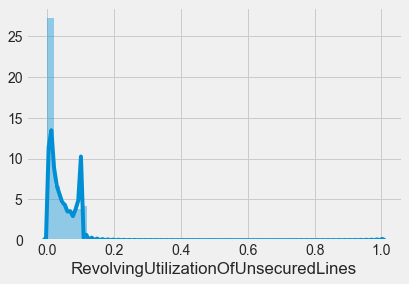

In [29]:
"""Histogram of RevolvingUtilizationOfUnsecuredLines after removing Outliers"""

sns.distplot( data["RevolvingUtilizationOfUnsecuredLines"],bins=50)

In [30]:
"""NumberOfTime3059DaysPastDueNotWorse"""


'NumberOfTime3059DaysPastDueNotWorse'

In [31]:
"""Describing NumberOfTime3059DaysPastDueNotWorse"""
data.NumberOfTime3059DaysPastDueNotWorse.describe()

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime3059DaysPastDueNotWorse, dtype: float64

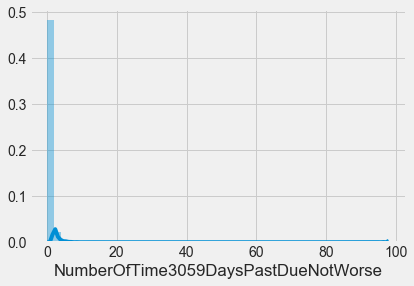

In [32]:
"""Histogram of NumberOfTime3059DaysPastDueNotWorse after removing Outliers"""


sns.distplot( data["NumberOfTime3059DaysPastDueNotWorse"],bins=50)

Looks 96 and 98 are outliers

In [33]:
"""Removing outliers : Replacing value at 96 and 98 with mean"""
New = []
medianNOTT = data.NumberOfTime3059DaysPastDueNotWorse.median()
for val in data.NumberOfTime3059DaysPastDueNotWorse:
    if ((val == 98) | (val == 96)):
        New.append(medianNOTT)
    else:
        New.append(val)

data.NumberOfTime3059DaysPastDueNotWorse = New

In [34]:
"""DebtRatio""" 

'DebtRatio'

In [35]:
"""Describing Debt Ratio"""
data.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [36]:
"""Debt ratio shoule be between 0 and 1"""
len(data[data.DebtRatio > 1])

35137

In [37]:
len(data[data.DebtRatio >0])

145887

In [38]:
"""Median of Debt ratio : Replacing value greater than 1 nwith median"""
New = []
medianNOTT = data.DebtRatio.median()
for val in data.NumberRealEstateLoansOrLines:
    if val>1:
        New.append(medianNOTT)
    else:
        New.append(val)

data.DebtRatio = New

In [39]:
"""NumberOfOpenCreditLinesAndLoans"""

'NumberOfOpenCreditLinesAndLoans'

In [40]:
"""Describing NumberOfOpenCreditLinesAndLoans"""
data.NumberOfOpenCreditLinesAndLoans.describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

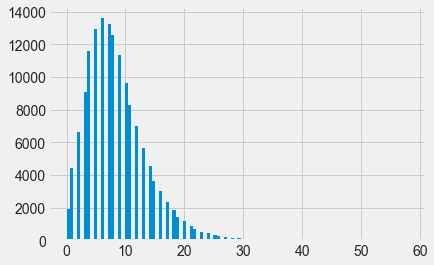

In [41]:
"""Histogram of NumberOfOpenCreditLinesAndLoans : Checking Distribution"""
data['NumberOfOpenCreditLinesAndLoans'].hist(bins=100)
plt.show()

In [42]:
"""NumberOfTimes90DaysLate"""

'NumberOfTimes90DaysLate'

In [43]:
"""Describing NumberOfTimes90DaysLate"""
data.NumberOfTimes90DaysLate.describe()

count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

In [44]:
"""Removing Outlier : Replacing value at 98 and 96 with mean"""
New = []
medianNOTT = data.NumberOfTimes90DaysLate.median()
for val in data.NumberOfTimes90DaysLate:
    if ((val == 98) | (val == 96)):
        New.append(medianNOTT)
    else:
        New.append(val)

data.NumberOfTimes90DaysLate = New

In [45]:
"""NumberRealEstateLoansOrLines"""

'NumberRealEstateLoansOrLines'

In [46]:
"""Describing NumberRealEstateLoansOrLines"""
data.NumberRealEstateLoansOrLines.describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [47]:
"""Removing Outlier : Replacing value greater than with 50 with mean"""
New = []
medianNOTT = data.NumberRealEstateLoansOrLines.median()
for val in data.NumberRealEstateLoansOrLines:
    if val>50:
        New.append(medianNOTT)
    else:
        New.append(val)

data.NumberRealEstateLoansOrLines = New

In [48]:
"""Describing NumberRealEstateLoansOrLines"""
data.NumberRealEstateLoansOrLines.describe()

count    150000.000000
mean          1.017887
std           1.121458
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [49]:
"""NumberOfTime6089DaysPastDueNotWorse"""

'NumberOfTime6089DaysPastDueNotWorse'

In [50]:
"""Describing NumberOfTime6089DaysPastDueNotWorse"""
data.NumberOfTime6089DaysPastDueNotWorse.describe()

count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime6089DaysPastDueNotWorse, dtype: float64

In [51]:
"""Removing Outlier : Replacing value at 98 and 96 with mean"""
New = []
medianNOTT = data.NumberOfTime6089DaysPastDueNotWorse.median()
for val in data.NumberOfTime6089DaysPastDueNotWorse:
    if ((val == 98) | (val == 96)):
        New.append(medianNOTT)
    else:
        New.append(val)

data.NumberOfTime6089DaysPastDueNotWorse = New

In [52]:
data.NumberOfTime6089DaysPastDueNotWorse.describe()

count    150000.000000
mean          0.064707
std           0.329788
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: NumberOfTime6089DaysPastDueNotWorse, dtype: float64

In [53]:
"""NumberOfDependents"""

'NumberOfDependents'

In [54]:
"""Describing NumberOfDependents"""
data.NumberOfDependents.describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [55]:
"""having more than 10 dependents looks weird"""

'having more than 10 dependents looks weird'

In [56]:
"""Removing more than 10 dependents with median"""
New = []
medianNOTT = data.NumberOfDependents.median()
for val in data.NumberOfDependents:
    if val>10:
        New.append(medianNOTT)
    else:
        New.append(val)

data.NumberOfDependents = New

In [57]:
"""Checking null values in NumberOfDependents"""
data.NumberOfDependents.isnull().sum()

3924

In [58]:
"""Replacing null with 0 for NumberOfDependents"""
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(0)

In [59]:
data.NumberOfDependents.describe()

count    150000.000000
mean          0.737193
std           1.105454
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: NumberOfDependents, dtype: float64

In [60]:
"""MonthlyIncome"""

'MonthlyIncome'

In [61]:
"""Describing Monthly Income"""
data.MonthlyIncome.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [62]:
"""Using Linear Regression to predict the missing values in Monthly Income"""

'Using Linear Regression to predict the missing values in Monthly Income'

In [63]:
"""Splitting into train and test where monthly income is not null and null"""
train = data[data.MonthlyIncome.isnull() == False]
test = data[data.MonthlyIncome.isnull() == True]

In [64]:
"""Dimension of train and test"""
train.shape, test.shape

((120269, 13), (29731, 13))

In [65]:
"""Making final X_train, y_train and X_test to predict. y_train is the dependent variable """
X_train = train.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)
y_train = train.MonthlyIncome
X_test = test.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)

In [66]:
"""Making Model"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [67]:
"""Fitting the Model"""
lmMod = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)

/Users/hswamy/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [68]:
"""Model coefficients"""
lmMod.coef_

array([-3961.33740175,    32.03621524,  -102.68003447,   -72.09238452,
         108.74675887,  -144.60250509,  1261.76661631,  -151.79776075,
         720.53795628,     0.        ,     0.        ])

In [69]:
"""predicting on test set which are the missing values"""
pred = lmMod.predict(X_test)

In [70]:
predNoZero = []
for val in pred:
    if val >= 0:
        predNoZero.append(val)
    else:
        predNoZero.append(0.)

In [71]:
testFull = data[data.MonthlyIncome.isnull() == True]

In [72]:
testFull['MonthlyIncome'] = predNoZero

/Users/hswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
monNew = []
for index in data.index:
    if data.MonthlyIncome[index].is_integer() == True:
        monNew.append(data.MonthlyIncome[index])
    else:
        monNew.append(testFull.MonthlyIncome[index])

In [74]:
data.MonthlyIncome = monNew

In [75]:
"""Checking null values in Monthly Income"""
testFull.MonthlyIncome.isnull().sum()

0

In [76]:
data.MonthlyIncome.describe()

count    1.500000e+05
mean     6.546697e+03
std      1.290913e+04
min      0.000000e+00
25%      3.733000e+03
50%      5.523671e+03
75%      7.869197e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x11889e710>],
 'caps': [<matplotlib.lines.Line2D at 0x11863fda0>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x118379358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11889e3c8>,
  <matplotlib.lines.Line2D at 0x11889e208>]}

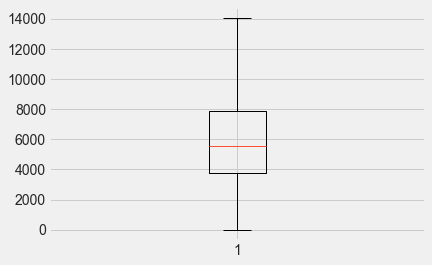

In [77]:
# WITHOUT OUTLIERS

plt.boxplot(data.MonthlyIncome, sym='')

{'boxes': [<matplotlib.lines.Line2D at 0x11901b518>],
 'caps': [<matplotlib.lines.Line2D at 0x11902e6a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1190372e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x119037358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1190252b0>,
  <matplotlib.lines.Line2D at 0x119025e48>]}

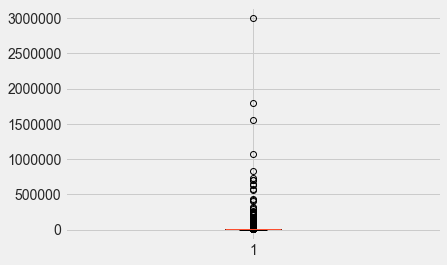

In [78]:
# WITH OUTLIER...

plt.boxplot(data.MonthlyIncome)

In [79]:
def get_subset_by_IQR(df,column):
   # q1 = df[column].quantile(0.01)
    q3 = df[column].quantile(0.99)
    iqr = (df[column] < q3)
    return df.loc[iqr]

data = get_subset_by_IQR(data,'MonthlyIncome')

{'boxes': [<matplotlib.lines.Line2D at 0x1192d8e48>],
 'caps': [<matplotlib.lines.Line2D at 0x1192e1828>,
 'fliers': [<matplotlib.lines.Line2D at 0x1192f2eb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1192f21d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1192d8390>,
  <matplotlib.lines.Line2D at 0x1192e1b70>]}

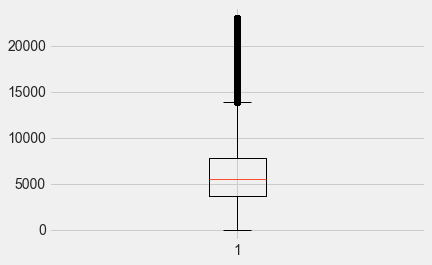

In [80]:
# AFTER REMOVING OUTLIERS....

plt.boxplot(data.MonthlyIncome)

In [81]:
data.MonthlyIncome.describe()

count    148499.000000
mean       6101.379304
std        3543.210474
min           0.000000
25%        3700.000000
50%        5500.000000
75%        7754.000000
max       23033.000000
Name: MonthlyIncome, dtype: float64

In [82]:
data.shape

(148499, 13)

In [83]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,NoIncome_MI_indicator,RUUL_indicator
0,1,0.076613,45.0,2.0,0.366508,9120.0,13,0.0,6.0,0.0,2.0,0,0
1,0,0.095715,40.0,0.0,0.000000,2600.0,4,0.0,0.0,0.0,1.0,0,0
2,0,0.065818,38.0,1.0,0.000000,3042.0,2,1.0,0.0,0.0,0.0,0,0
3,0,0.023381,30.0,0.0,0.000000,3300.0,5,0.0,0.0,0.0,0.0,0,0
5,0,0.021318,74.0,0.0,1.000000,3500.0,3,0.0,1.0,0.0,1.0,0,0


In [84]:
data['SeriousDlqin2yrs'].value_counts()

0    138555
1      9944
Name: SeriousDlqin2yrs, dtype: int64

In [85]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime6089DaysPastDueNotWorse',
       'NumberOfDependents', 'NoIncome_MI_indicator', 'RUUL_indicator'],
      dtype='object')

In [86]:
model_variables = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime6089DaysPastDueNotWorse',
       'NumberOfDependents', 'RUUL_indicator']

loans_data_relevent = data[model_variables]

In [87]:
X = np.array(loans_data_relevent.ix[:, loans_data_relevent.columns != 'SeriousDlqin2yrs'])
y = np.array(loans_data_relevent.ix[:, loans_data_relevent.columns == 'SeriousDlqin2yrs'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (148499, 11)
Shape of y: (148499, 1)


/Users/hswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [88]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2,ratio=1)
X_train_res, y_train_res = sm.fit_sample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [9944]
Before OverSampling, counts of label '0': [138555] 



/Users/hswamy/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


After OverSampling, the shape of train_X: (277110, 11)
After OverSampling, the shape of train_y: (277110,) 

After OverSampling, counts of label '1': 138555
After OverSampling, counts of label '0': 138555


In [89]:
x_train_feature = pd.DataFrame(X_train_res)
y_train_target = pd.DataFrame(y_train_res)
Somte_data = pd.concat([x_train_feature, y_train_target], axis=1, ignore_index=True)

In [90]:
Somte_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.076613,45.0,2.0,0.366508,9120.0,13.0,0.0,6.0,0.0,2.0,0.0,1
1,0.095715,40.0,0.0,0.000000,2600.0,4.0,0.0,0.0,0.0,1.0,0.0,0
2,0.065818,38.0,1.0,0.000000,3042.0,2.0,1.0,0.0,0.0,0.0,0.0,0
3,0.023381,30.0,0.0,0.000000,3300.0,5.0,0.0,0.0,0.0,0.0,0.0,0
4,0.021318,74.0,0.0,1.000000,3500.0,3.0,0.0,1.0,0.0,1.0,0.0,0


In [91]:
oldNames = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11] 
newNames = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime6089DaysPastDueNotWorse',
       'NumberOfDependents', 'RUUL_indicator','SeriousDlqin2yrs']
Somte_data.rename(columns=dict(zip(oldNames,newNames)), inplace=True)

In [92]:
Somte_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,RUUL_indicator,SeriousDlqin2yrs
0,0.076613,45.0,2.0,0.366508,9120.0,13.0,0.0,6.0,0.0,2.0,0.0,1
1,0.095715,40.0,0.0,0.000000,2600.0,4.0,0.0,0.0,0.0,1.0,0.0,0
2,0.065818,38.0,1.0,0.000000,3042.0,2.0,1.0,0.0,0.0,0.0,0.0,0
3,0.023381,30.0,0.0,0.000000,3300.0,5.0,0.0,0.0,0.0,0.0,0.0,0
4,0.021318,74.0,0.0,1.000000,3500.0,3.0,0.0,1.0,0.0,1.0,0.0,0


In [93]:
data =  Somte_data

In [94]:
base_data = data

In [95]:
base_data.shape

(277110, 12)

In [97]:
data.shape

(277110, 12)

# FEATURE ENGINEERING

In [102]:
def feature_eng(df):
    for val in df.MonthlyIncome:
        if val <=0:
            df['NoIncome_MI_indicator']=1
        else:
            df['NoIncome_MI_indicator']=0
    
            
    for val in df.DebtRatio:
        if val <=0:
            df['No_DebtRatio_indicator']=1
        else:
            df['No_DebtRatio_indicator']=0
            
    

    df['MIz_DRnz']=list(map(lambda x,y: 1 if (x==0 and y>0) else 0, df['MonthlyIncome'], df['DebtRatio']))
    df['MIz_DRz']=list(map(lambda x,y: 1 if (x==0 and y==0) else 0, df['MonthlyIncome'], df['DebtRatio']))
    df['MInz_DRz']=list(map(lambda x,y: 1 if (x>0 and y==0) else 0, df['MonthlyIncome'], df['DebtRatio']))
    
    
    
    for val in df.RevolvingUtilizationOfUnsecuredLines:
        if val <=0:
            df['ZeroRevolvingUtilization']=1
        else:
            df['ZeroRevolvingUtilization']=0
            
   
                      
    for val in df.MonthlyIncome:
        if val ==0:
            MIZ=1
        else:
            MIZ=val
            
    
            
    df['DR_MI']=MIZ*df['DebtRatio']
    
    df['Log_DR_MI']=np.log(df.DR_MI)
    
    df['Log_DR_MI']=df.Log_DR_MI.replace([np.inf, -np.inf], 0)
    df['RevolvingLines']=df['NumberOfOpenCreditLinesAndLoans']-df['NumberRealEstateLoansOrLines']
    
   
    
    HRSL=[]
    for val in df.NumberRealEstateLoansOrLines:
        if val >0:
            HRSL.append(1)
        else:
            HRSL.append(0)
            
    
        
    df['HasRealEstateLoans']=HRSL
    
    MHRSL=[]
    for val in df.NumberRealEstateLoansOrLines:
        if val >2:
            MHRSL.append(1)
        else:
            MHRSL.append(0)
            
    
        
    df['HasMultipleRealEstateLoans ']=MHRSL
    df['DisposableIncome']=(1-df['DebtRatio'])*df['MonthlyIncome']
    df['RevolvingToRealEstate']=df['RevolvingLines'] / (1+df['NumberRealEstateLoansOrLines'])
    
    
    
    FU=[]
    for val in df.RevolvingUtilizationOfUnsecuredLines:
        if val ==1:
            FU.append(1)
        else:
            FU.append(0)
        
        
    df['FullUtilization']=FU
    
   
    
    EU=[]
    for val in df.RevolvingUtilizationOfUnsecuredLines:
        if val >1:
            EU.append(1)
        else:
            EU.append(0)
        
    df['ExcessUtilization']=EU
    
    
    
    df['RevolvingLinesPerPerson'] = df['RevolvingLines'] / (1+df['NumberOfDependents'])
    df['RealEstateLoanPerPerson'] = df['NumberRealEstateLoansOrLines'] / (1+df['NumberOfDependents'])
    
    df['IncomePerDependent']=(1+df['MonthlyIncome']) / (1+df['NumberOfDependents'])
    
    df['NumberOfTimePastDue']=df['NumberOfTime3059DaysPastDueNotWorse']+df['NumberOfTime6089DaysPastDueNotWorse']+df['NumberOfTimes90DaysLate']
    df['DelinquenciesPerLine']=df['NumberOfTimePastDue'] /df['NumberOfOpenCreditLinesAndLoans']
    
    
    df['DelinquenciesPerLine']=df.DelinquenciesPerLine.replace([np.inf, -np.inf], np.NaN)
    df.DelinquenciesPerLine[np.isnan(df.DelinquenciesPerLine)] = 0
    df.DelinquenciesPerLine[np.isinf(df.DelinquenciesPerLine)] = 0
    df['DelinquenciesPerLine']=df['DelinquenciesPerLine'].fillna(0)
    
    df['DelinquenciesPerLine']=df.DelinquenciesPerLine.replace([np.inf, -np.inf], 0)
    df['DelinquenciesPerRevolvingLine'] = df['NumberOfTimePastDue'] / df['RevolvingLines']
    
    df['DelinquenciesPerRevolvingLine']=df.DelinquenciesPerRevolvingLine.replace([np.inf, -np.inf], np.NaN)
    df.DelinquenciesPerRevolvingLine[np.isnan(df.DelinquenciesPerRevolvingLine)] = 0
    df.DelinquenciesPerRevolvingLine[np.isinf(df.DelinquenciesPerRevolvingLine)] = 0
    df['DelinquenciesPerRevolvingLine']=df['DelinquenciesPerRevolvingLine'].fillna(0)
    
    
    
    return(df)

In [103]:
import sys
import time
import timeit
start_time = time.time()

feature_data= feature_eng(data)

end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))


/Users/hswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log
/Users/hswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Elapsed time was 313.223 seconds


/Users/hswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [106]:
final_data = feature_data

In [107]:
feature_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,RUUL_indicator,SeriousDlqin2yrs,NoIncome_MI_indicator,No_DebtRatio_indicator,MIz_DRnz,MIz_DRz,MInz_DRz,ZeroRevolvingUtilization,DR_MI,Log_DR_MI,RevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,DisposableIncome,RevolvingToRealEstate,FullUtilization,ExcessUtilization,RevolvingLinesPerPerson,RealEstateLoanPerPerson,IncomePerDependent,NumberOfTimePastDue,DelinquenciesPerLine,DelinquenciesPerRevolvingLine
0,0.076613,45.0,2.0,0.366508,9120.0,13.0,0.0,6.0,0.0,2.0,0.0,1,0,1,0,0,0,0,1136.787317,7.035961,7.0,1,1,5777.44849,1.0,0,0,2.333333,2.0,3040.333333,2.0,0.153846,0.285714
1,0.095715,40.0,0.0,0.000000,2600.0,4.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,1,0,0.000000,0.000000,4.0,0,0,2600.00000,4.0,0,0,2.000000,0.0,1300.500000,0.0,0.000000,0.000000
2,0.065818,38.0,1.0,0.000000,3042.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0.000000,0.000000,2.0,0,0,3042.00000,2.0,0,0,2.000000,0.0,3043.000000,2.0,1.000000,1.000000
3,0.023381,30.0,0.0,0.000000,3300.0,5.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0.000000,0.000000,5.0,0,0,3300.00000,5.0,0,0,5.000000,0.0,3301.000000,0.0,0.000000,0.000000
4,0.021318,74.0,0.0,1.000000,3500.0,3.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,0,0,0,3101.672570,8.039697,2.0,1,0,0.00000,1.0,0,0,1.000000,0.5,1750.500000,0.0,0.000000,0.000000


In [108]:
feature_data.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime3059DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime6089DaysPastDueNotWorse',
       'NumberOfDependents', 'RUUL_indicator', 'SeriousDlqin2yrs',
       'NoIncome_MI_indicator', 'No_DebtRatio_indicator', 'MIz_DRnz',
       'MIz_DRz', 'MInz_DRz', 'ZeroRevolvingUtilization', 'DR_MI', 'Log_DR_MI',
       'RevolvingLines', 'HasRealEstateLoans', 'HasMultipleRealEstateLoans ',
       'DisposableIncome', 'RevolvingToRealEstate', 'FullUtilization',
       'ExcessUtilization', 'RevolvingLinesPerPerson',
       'RealEstateLoanPerPerson', 'IncomePerDependent', 'NumberOfTimePastDue',
       'DelinquenciesPerLine', 'DelinquenciesPerRevolvingLine'],
      dtype='object')

In [109]:
feature_data.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
NumberOfTime3059DaysPastDueNotWorse     float64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime6089DaysPastDueNotWorse     float64
NumberOfDependents                      float64
RUUL_indicator                          float64
SeriousDlqin2yrs                          int64
NoIncome_MI_indicator                     int64
No_DebtRatio_indicator                    int64
MIz_DRnz                                  int64
MIz_DRz                                   int64
MInz_DRz                                  int64
ZeroRevolvingUtilization                  int64
DR_MI                                   float64
Log_DR_MI                               float64
RevolvingLines                          

# RANDOM FOREST ALGO-----

In [111]:

feature_data.insert(0, 'New_ID_1', range(110, 110 + len(feature_data)))

# calculate the time to run a GridSearchCV for multiple numbers of parameter permutations.  
grid_times = {}
clf = RandomForestClassifier(random_state = 84)

X_total = feature_data.drop(['New_ID_1','SeriousDlqin2yrs'], axis=1)
Y_total = feature_data['SeriousDlqin2yrs']

In [112]:
X_total.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,RUUL_indicator,NoIncome_MI_indicator,No_DebtRatio_indicator,MIz_DRnz,MIz_DRz,MInz_DRz,ZeroRevolvingUtilization,DR_MI,Log_DR_MI,RevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,DisposableIncome,RevolvingToRealEstate,FullUtilization,ExcessUtilization,RevolvingLinesPerPerson,RealEstateLoanPerPerson,IncomePerDependent,NumberOfTimePastDue,DelinquenciesPerLine,DelinquenciesPerRevolvingLine
0,0.076613,45.0,2.0,0.366508,9120.0,13.0,0.0,6.0,0.0,2.0,0.0,0,1,0,0,0,0,1136.787317,7.035961,7.0,1,1,5777.44849,1.0,0,0,2.333333,2.0,3040.333333,2.0,0.153846,0.285714
1,0.095715,40.0,0.0,0.000000,2600.0,4.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,1,0,0.000000,0.000000,4.0,0,0,2600.00000,4.0,0,0,2.000000,0.0,1300.500000,0.0,0.000000,0.000000
2,0.065818,38.0,1.0,0.000000,3042.0,2.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0.000000,0.000000,2.0,0,0,3042.00000,2.0,0,0,2.000000,0.0,3043.000000,2.0,1.000000,1.000000
3,0.023381,30.0,0.0,0.000000,3300.0,5.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0.000000,0.000000,5.0,0,0,3300.00000,5.0,0,0,5.000000,0.0,3301.000000,0.0,0.000000,0.000000
4,0.021318,74.0,0.0,1.000000,3500.0,3.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,3101.672570,8.039697,2.0,1,0,0.00000,1.0,0,0,1.000000,0.5,1750.500000,0.0,0.000000,0.000000


# HYPERPARAMETER TUNNING.....

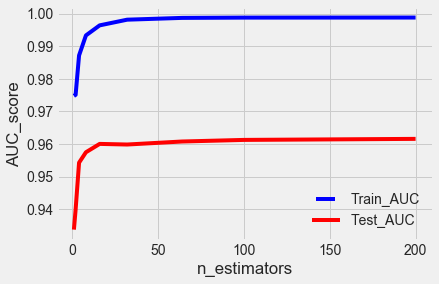

In [113]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

x_train, x_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.25)

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train_AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test_AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC_score")
plt.xlabel("n_estimators")
plt.show()

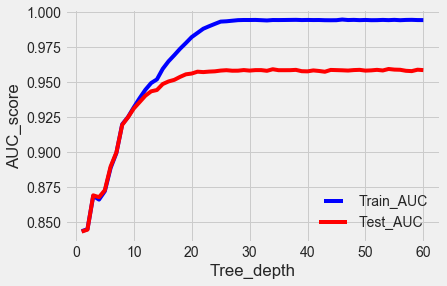

In [114]:
max_depths = np.linspace(1, 60, 60, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train_AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test_AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC_score")
plt.xlabel("Tree_depth")
plt.show()

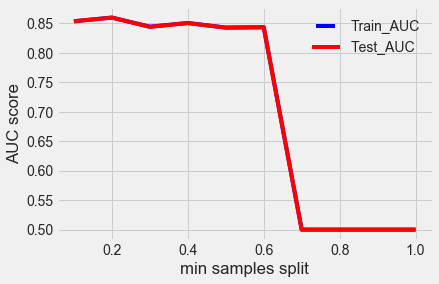

In [115]:
#---- min_samples_split-------#

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train_AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test_AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

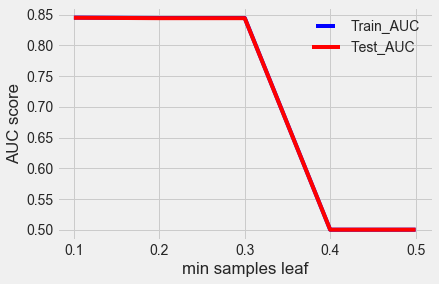

In [116]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train_AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test_AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

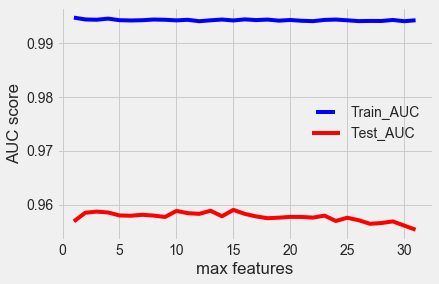

In [118]:
max_features = list(range(1,X_total.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train_AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test_AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()

In [122]:

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

# Utility function to report best scores
def report(results, n_top=4):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [5, None],
              "max_features": sp_randint(1, 32),
              "min_samples_split": sp_randint(2, 32),
              "min_samples_leaf": sp_randint(1, 32),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

#start_time = time.time()
random_search.fit(X_total, Y_total)
#print("RandomizedSearchCV took %.2f seconds for %d candidates"
      #" parameter settings." % ((time() - start_time), n_iter_search))
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.949 (std: 0.033)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 22}

Model with rank: 2
Mean validation score: 0.947 (std: 0.036)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 15, 'min_samples_split': 6}

Model with rank: 3
Mean validation score: 0.946 (std: 0.040)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 22, 'min_samples_leaf': 5, 'min_samples_split': 27}

Model with rank: 4
Mean validation score: 0.946 (std: 0.039)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 18, 'min_samples_split': 15}



In [126]:
# use a full grid over all parameters
param_grid = {"n_estimators": [10, 30, 60],
              "max_depth": [3, None],
              "max_features": ['auto', 'sqrt', 'log2'],
              "min_samples_split": [19, 30],
              "min_samples_leaf": [5, 10, 30],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [128]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time.time()
grid_search.fit(X_total, Y_total)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=84, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 30, 60], 'max_depth': [3, None], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [19, 30], 'min_samples_leaf': [5, 10, 30], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [173]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 19,
 'n_estimators': 60}

In [143]:

def report_grd(grid_scores, n_top):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.4f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")



In [144]:

report_grd(grid_search.grid_scores_,4)

Model with rank: 1
Mean validation score: 0.9509)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 19, 'n_estimators': 60}

Model with rank: 2
Mean validation score: 0.9509)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 19, 'n_estimators': 60}

Model with rank: 3
Mean validation score: 0.9509)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 19, 'n_estimators': 60}

Model with rank: 4
Mean validation score: 0.9509)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 19, 'n_estimators': 60}



/Users/hswamy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [145]:
clf = RandomForestClassifier(bootstrap = False,
                             criterion = 'entropy',
                             max_features = 'auto',
                             min_samples_split = 19, 
                             #max_leaf_nodes = 15, 
                             n_estimators = 60, 
                             max_depth = None,
                             min_samples_leaf = 5)

In [147]:
clf.fit(X_total, Y_total);

In [148]:
Y_prob_total = clf.predict_proba(X_total)

dtype = [('Col1','int32'), ('Col2','float32')]
values = Y_prob_total
index = ['Row'+str(i) for i in range(1, len(values)+1)]

prob_df1 = pd.DataFrame(values, index=index)
prob_df1.reset_index(inplace=True,drop = True)

feature_data['Global_prob_nondefault']=prob_df1[0]
feature_data['Global_prob_default']=prob_df1[1]

In [149]:
feature_data.head(10)

,New_ID_1,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,RUUL_indicator,SeriousDlqin2yrs,NoIncome_MI_indicator,No_DebtRatio_indicator,MIz_DRnz,MIz_DRz,MInz_DRz,ZeroRevolvingUtilization,DR_MI,Log_DR_MI,RevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,DisposableIncome,RevolvingToRealEstate,FullUtilization,ExcessUtilization,RevolvingLinesPerPerson,RealEstateLoanPerPerson,IncomePerDependent,NumberOfTimePastDue,DelinquenciesPerLine,DelinquenciesPerRevolvingLine,Global_prob_nondefault,Global_prob_default
0,110,0.076613,45.0,2.0,0.366508,9120.000000,13.0,0.0,6.0,0.0,2.0,0.0,1,0,1,0,0,0,0,1136.787317,7.035961,7.0,1,1,5777.448490,1.000000,0,0,2.333333,2.000000,3040.333333,2.0,0.153846,0.285714,0.308923,0.691077
1,111,0.095715,40.0,0.0,0.000000,2600.000000,4.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,1,0,0.000000,0.000000,4.0,0,0,2600.000000,4.000000,0,0,2.000000,0.000000,1300.500000,0.0,0.000000,0.000000,0.941428,0.058572
2,112,0.065818,38.0,1.0,0.000000,3042.000000,2.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0.000000,0.000000,2.0,0,0,3042.000000,2.000000,0,0,2.000000,0.000000,3043.000000,2.0,1.000000,1.000000,0.786003,0.213997
3,113,0.023381,30.0,0.0,0.000000,3300.000000,5.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0.000000,0.000000,5.0,0,0,3300.000000,5.000000,0,0,5.000000,0.000000,3301.000000,0.0,0.000000,0.000000,0.994345,0.005655
4,114,0.021318,74.0,0.0,1.000000,3500.000000,3.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,0,0,0,3101.672570,8.039697,2.0,1,0,0.000000,1.000000,0,0,1.000000,0.500000,1750.500000,0.0,0.000000,0.000000,0.989529,0.010471
5,115,0.030568,57.0,0.0,0.366508,8682.959225,8.0,0.0,3.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1136.787317,7.035961,5.0,1,1,5500.586586,1.250000,0,0,5.000000,3.000000,8683.959225,0.0,0.000000,0.000000,0.968158,0.031842
6,116,0.075446,39.0,0.0,0.000000,3500.000000,8.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0.000000,0.000000,8.0,0,0,3500.000000,8.000000,0,0,8.000000,0.000000,3501.000000,0.0,0.000000,0.000000,0.988576,0.011424
7,117,0.011695,27.0,0.0,0.000000,3385.277832,2.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0.000000,0.000000,2.0,0,0,3385.277832,2.000000,0,0,2.000000,0.000000,3386.277832,0.0,0.000000,0.000000,0.998198,0.001802
8,118,0.064423,30.0,0.0,0.000000,2500.000000,5.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0.000000,0.000000,5.0,0,0,2500.000000,5.000000,0,0,5.000000,0.000000,2501.000000,0.0,0.000000,0.000000,0.954853,0.045147
9,119,0.001880,51.0,0.0,0.366508,6501.000000,7.0,0.0,2.0,0.0,2.0,0.0,0,0,1,0,0,0,0,1136.787317,7.035961,5.0,1,0,4118.332526,1.666667,0,0,1.666667,0.666667,2167.333333,0.0,0.000000,0.000000,0.997507,0.002493


In [152]:
features_to_drop = ['SeriousDlqin2yrs', 'New_ID_1','Global_prob_nondefault','Global_prob_default']

feature_data_desc = feature_data.drop(features_to_drop, axis=1)

data_stats = feature_data_desc.describe(include='all')  # take the describtion of dataset
data_stats1 = data_stats.drop(['count','std'])   # drop the column which u don't require
clf.rfm = data_stats1                            # embedded the model with the above data

In [153]:
from sklearn.externals import joblib
joblib.dump(clf, 'random_frst.pkl') 

load_clf = joblib.load('random_frst.pkl')

In [156]:
load_clf

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=19, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [157]:
load_clf.rfm

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,RUUL_indicator,NoIncome_MI_indicator,No_DebtRatio_indicator,MIz_DRnz,MIz_DRz,MInz_DRz,ZeroRevolvingUtilization,DR_MI,Log_DR_MI,RevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,DisposableIncome,RevolvingToRealEstate,FullUtilization,ExcessUtilization,RevolvingLinesPerPerson,RealEstateLoanPerPerson,IncomePerDependent,NumberOfTimePastDue,DelinquenciesPerLine,DelinquenciesPerRevolvingLine
mean,0.050769,49.172756,0.562139,0.413276,5686.623202,8.054529,0.333957,0.978366,0.210115,0.818066,0.0,0.0,1.0,0.004601,0.003786,0.337317,0.0,1281.846085,4.852228,7.076163,0.658897,0.081441,3067.401970,4.103791,0.0,0.0,4.965396,0.653183,3869.911654,1.106211,0.320104,0.400268
min,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,-3.002444,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000
25%,0.009923,39.000000,0.000000,0.000000,3306.464082,4.261800,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.000000,0.000000,0.000000,199.878776,2.000000,0.0,0.0,2.000000,0.000000,1890.321894,0.000000,0.000000,0.000000
50%,0.047133,48.508165,0.000000,0.366508,5000.000000,7.000000,0.000000,1.000000,0.000000,0.214147,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,1136.787317,7.035961,6.000000,1.000000,0.000000,2803.107183,3.395755,0.0,0.0,4.000000,0.410472,3182.458023,0.107722,0.008553,0.008310
75%,0.088593,58.889688,1.000000,0.910742,7248.889622,11.000000,0.162332,1.608499,0.000000,1.357962,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.0,2824.824230,7.946201,9.577402,1.000000,0.000000,4699.000000,5.291712,0.0,0.0,7.000000,1.000000,5176.133687,1.713722,0.257142,0.295240
max,0.999000,91.000000,13.000000,1.000000,23033.000000,58.000000,17.000000,25.000000,11.000000,10.000000,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.0,3101.672570,8.039697,57.000000,1.000000,1.000000,23000.000000,57.000000,0.0,0.0,57.000000,23.000000,23034.000000,19.000000,3422.289048,6844.578097
